#**DBSCAN**


#Step 1 : Import Libraries



In [26]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

#Step 2 : Prepare dataset
###**use make blobs with different numbers**



In [27]:
X, y = make_blobs(n_samples=500, centers= 7, cluster_std= 0.4, random_state=42)
X.shape, y.shape

((500, 2), (500,))

#Step 3 : Modeling The Data Using DBSCAN



In [28]:
db = DBSCAN(eps=0.8, min_samples= 30).fit(X)

['y', 'b', 'g', 'r', 'm', 'c', 'w']


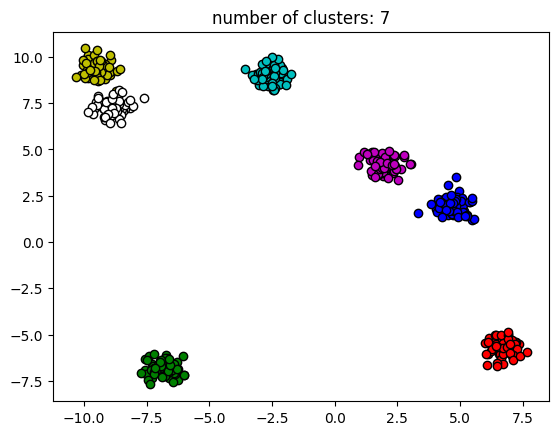

In [29]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r', 'm', 'c', 'w']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()


#Step 4 : Evaluation Metrics For DBSCAN Algorithm In Machine Learning


In [31]:
from sklearn import metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = metrics.adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.82
Adjusted Rand Index: 1.00


#**Well Done :)**

In [34]:
from sklearn.datasets import load_iris

iris = load_iris()

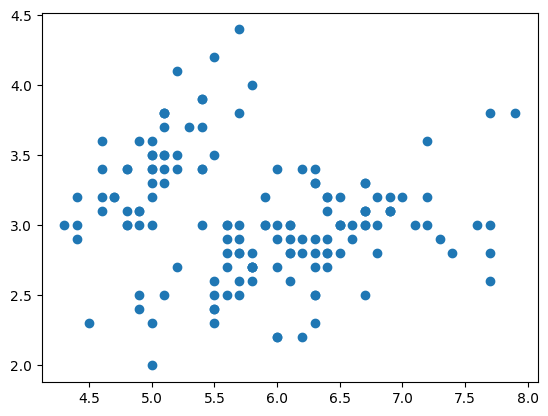

In [35]:
plt.scatter(iris.data[:,0], iris.data[:,1])
plt.show()

In [37]:
X = iris.data[:,:2]
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

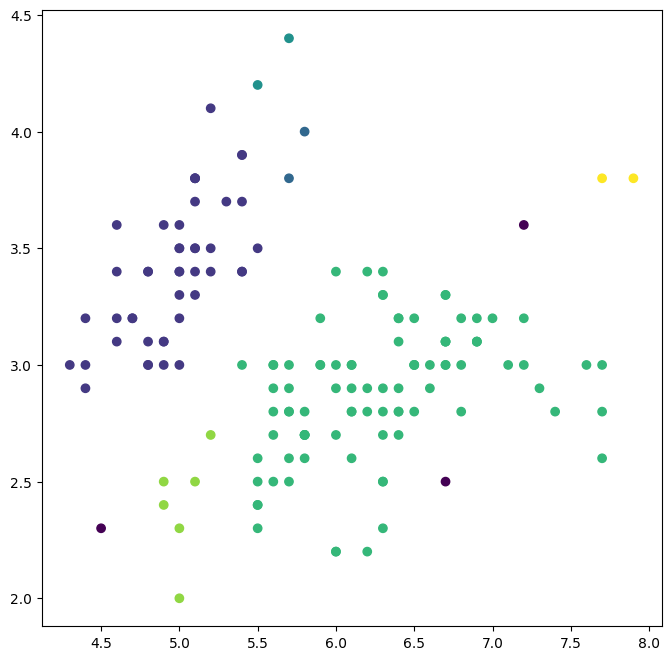

In [66]:
db = DBSCAN(eps= 0.3, min_samples=2).fit(X)

plt.figure(figsize=(8,8))
plt.scatter(iris.data[:,0], iris.data[:,1], c=db.labels_)
plt.show()

In [67]:
from sklearn import metrics
sc = metrics.silhouette_score(X, db.labels_)
print("Silhouette Coefficient:%0.2f" % sc)
ari = metrics.adjusted_rand_score(iris.target, db.labels_)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.24
Adjusted Rand Index: 0.49
